# SNEEP censo 2020. Reincidencia o delitos primarios

In [ ]:
#Importamos y renombramos las librerias a usar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import altair as alt
import plotly.express as px



## Preguntas de interés
1- ¿Cómo es la distribución entre reincidentes y personas con un único delito?

2- ¿Cómo es la distribución en todo el país?

3- ¿De que nacionalidad, al margen de Argentina es la que mas encontramos en los establecimientos penales?

4- Edad y Sexo ¿Cuál son las edades promedios?

5- ¿solteros o en pareja? ¿Quiénes recaen en la delicuencia?

6- ¿ Aquellas personas reincidentes tienen penas  condenas mas largas?

7- Las personas con delitos primarios, ¿cuentan con mas beneficios?

8- Quienes recaen mas ¿Personas con un trabajo?

9- ¿Cuál es el primer delito de los reincidentes? ¿Qué tipo de delito comenten los detenidos por primera vez?



# Datos API

In [ ]:
#Traemos del drive el dataset. https://docs.google.com/spreadsheets/d/1ce7ajP36QhHqu87KsMzFqXWMhAUX5T0snLdAkpZWRPI/edit#gid=19934855
sheet_url = 'https://docs.google.com/spreadsheets/d/1ce7ajP36QhHqu87KsMzFqXWMhAUX5T0snLdAkpZWRPI/export?format=csv&gid=19934855'
df_sneep = pd.read_csv(sheet_url)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Gestion de valores nulos y otros

In [ ]:
#Observamos varios NaN en diferentes columnas que no nos interesan para las hipotesis que plantearemos asi que hacemos un drop, eliminamos los varoles nulos
df_sneep2020 = df_sneep.drop(['Id','Año Censo','Tuvo_Reducción_Pena','ProvinciaId','Establecimiento','Sexo_Id','NacionalidadId','EstadoCivilId','NivelInstruccionId','UltimaSituacionLaboralId','CapacitacionLaboralAlIngresarId','UltimoLugarResidenciaId','Último Lugar Residencia','UltimaProvinciaResidenciaId','Última Provincia Residencia','JurisdiccionId','Jurisdicción','SituacionLegalId','Fecha_Detención','Fecha_Condenado','EstablecimientoDeProcedenciaId','Establecimiento de Procedencia','Delito1Id','Delito2Id','Delito3Id', 'Delito4Id', 'Delito5Id','HorasTrabajoRemuneradoId','Participación Programa Laboral','ParticipacionProgramaEducativoId','Recibio_Visitas_Último_Año','Tipo_Infracción_Disciplinaria','Participación_Actividades_Deportivas','AtencionMedicaUltimoAñoId','Atención_Medica_Último_Año','ParticipoAlteracionOrdenUltAñoId','Participó_Alteración_del_Orden_Último_Año', 'TipoInfraccionDisciplinariaId','Participa Programa PreLibertad', 'Tipo Condena','Tentativa Suicidio','SancionAplicadaId', 'Sanción_Aplicada', 'CalificacionConductaId', 'TentativaFugasEvasionesId','FueLesionadoId', 'Fue_Lesionado', 'RangoDuracionCondenaId', 'EsReincidenteId', 'TienePeriodoProgresividadId', 'Tiene_Período_Progresividad', 'ReparticionId', 'Repartición', 'TuvoSalidasTransitoriasId', 'IncorporadoRegSemiLibertadId', 'ParticipaProgramaPrisionDiscontinuaId', 'ParticipaProgramaSemiDetencionId', 'TuvoReduccionPenaId', 'Persona_Gestante_Tiene_Hijos_Intramuro'], axis = 1)

In [ ]:
#Analizamos las primeras 5 filas del nuevo df.
df_sneep2020.head(5) 

,Provincia,EstablecimientoId,EdadCenso,Sexo,Nacionalidad,Estado_Civil,Nivel_Instrucción,Última_Situación_Laboral,Capacitación_Laboral_Al_Ingresar,Situación_Legal,...,Participación_Programa_Educativo,Calificacion_Conducta,Tentativa_Fugas_Evasiones,Duración_Condena_Años,Duración_Condena_Meses,Es_Reincidente,Tuvo_Salidas_Transitorias,Incorporado_Rég_Semi_Libertad,Participa_Programa_Prisión_Discontinua,Participa_Programa_Semi_Detención
0,Chubut,16,35,Varón,Argentina,Soltero/a,Secundario completo,Trabajador/ra de tiempo completo,Tiene alguna profesión,Condenado/a,...,No participa de ningún programa educativo,Muy buena,No,25,0,Primario/a,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
1,Chubut,16,28,Varón,Argentina,Soltero/a,Secundario incompleto,Desocupado/a,Tiene algún oficio,Condenado/a,...,Si - educación formal - SECUNDARIA (Polimodal),Sin calificación,No,4,0,Reincidente,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
2,Chubut,16,33,Varón,Argentina,Conviviente,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,Condenado/a,...,No participa de ningún programa educativo,Buena,No,13,0,Reiterante,Suspendidas durante el Último año,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
3,Chubut,16,35,Varón,Argentina,Conviviente,Primario completo,Desocupado/a,Tiene algún oficio,Condenado/a,...,Si - educación formal - SECUNDARIA (Polimodal),Buena,No,4,6,Reincidente,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
4,Chubut,16,33,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,Condenado/a,...,No participa de ningún programa educativo,Buena,No,5,0,Reiterante,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención


In [ ]:
#Identificamos los valores a reemplazar
df_sneep2020.Capacitación_Laboral_Al_Ingresar.unique() 

array(['Tiene alguna profesión', 'Tiene algún oficio',
       'No tiene ni oficio ni profesión', nan], dtype=object)

In [ ]:
#Correciones gramaticales
df_sneep2020["Delito_1"].replace(['Delitos contra la seguridad de la naciÃ³n'], 'Delitos contra la seguridad de la nación', inplace=True)

In [ ]:
df_sneep2020["Delito_1"].replace(['Del. contra la lib. comet. por func. pÃºblico'], 'Del. contra la lib. comet. por func. público', inplace=True)

In [ ]:
df_sneep2020["Delito_1"].replace(['Delitos c/el orden pÃºblico'], 'Delitos c/el orden público', inplace=True)

In [ ]:
df_sneep2020["Delito_2"].replace(['Delitos contra la seguridad de la naciÃ³n'], 'Delitos contra la seguridad de la nación', inplace=True)

In [ ]:
df_sneep2020["Delito_2"].replace(['Delitos c/el orden pÃºblico'], 'Delitos c/el orden público', inplace=True)

In [ ]:
df_sneep2020["Delito_2"].replace(['Del. contra la lib. comet. por func. pÃºblico'], 'Del. contra la lib. comet. por func. público', inplace=True)

In [ ]:
df_sneep2020["Delito_3"].replace(['Delitos contra la seguridad de la naciÃ³n'], 'Delitos contra la seguridad de la nación', inplace=True)

In [ ]:
df_sneep2020["Delito_3"].replace(['Delitos c/el orden pÃºblico'], 'Delitos c/el orden público', inplace=True)

In [ ]:
df_sneep2020["Delito_3"].replace(['Del. contra la lib. comet. por func. pÃºblico'], 'Del. contra la lib. comet. por func. público', inplace=True)

In [ ]:
df_sneep2020["Delito_4"].replace(['Delitos contra la seguridad de la naciÃ³n'], 'Delitos contra la seguridad de la nación', inplace=True)

In [ ]:
df_sneep2020["Delito_4"].replace(['Delitos c/el orden pÃºblico'], 'Delitos c/el orden público', inplace=True)

In [ ]:
df_sneep2020["Delito_4"].replace(['Del. contra la lib. comet. por func. pÃºblico'], 'Del. contra la lib. comet. por func. público', inplace=True)

In [ ]:
df_sneep2020["Delito_5"].replace(['Delitos c/el orden pÃºblico'], 'Delitos c/el orden público', inplace=True)

In [ ]:
df_sneep2020["Calificacion_Conducta"].replace(['PÃ©sima'], 'Pesima', inplace=True)

In [ ]:
df_sneep2020["Tentativa_Fugas_Evasiones"].replace(['SI. tentativa de evasiÃ³n'], 'SI. tentativa de evasión', inplace=True)

In [ ]:
df_sneep2020["Participa_Programa_Semi_Detención"].replace(['Si. PrisiÃ³n Diurna'], 'Si. Prisión Diurna', inplace=True)

In [ ]:
df_sneep2020["Participa_Programa_Semi_Detención"].replace(['Si. PrisiÃ³n Nocturna'], 'Si. Prisión Nocturna', inplace=True)

In [ ]:
 #Identificamos cuales son las variables que tienen valores nulos para poder trabajarlas
 df_sneep2020.isna().sum()

Provincia                                     0
EstablecimientoId                             0
EdadCenso                                     0
Sexo                                          0
Nacionalidad                                  0
Estado_Civil                                  0
Nivel_Instrucción                             0
Última_Situación_Laboral                      0
Capacitación_Laboral_Al_Ingresar           2254
Situación_Legal                               0
Delito_1                                   2648
Delito_2                                  77188
Delito_3                                  90928
Delito_4                                  93876
Delito_5                                  94532
Horas_Trabajo_Remunerado                   2368
Participación_Programa_Educativo           1780
Calificacion_Conducta                      1935
Tentativa_Fugas_Evasiones                    78
Duración_Condena_Años                         0
Duración_Condena_Meses                  

In [ ]:
#Para poder trabajar tomamos el valor que mas se repite y reemplazamos Nan con dicho valor, repetimos en las diferentes variables.
df_sneep2020.Capacitación_Laboral_Al_Ingresar.value_counts() 

No tiene ni oficio ni profesión    43384
Tiene algún oficio                 39148
Tiene alguna profesión             10158
Name: Capacitación_Laboral_Al_Ingresar, dtype: int64

In [ ]:
#Pasamos en % para visualizar mejor la media
100 * df_sneep2020['Capacitación_Laboral_Al_Ingresar'].value_counts() / len(df_sneep2020['Capacitación_Laboral_Al_Ingresar'])

No tiene ni oficio ni profesión    45.694304
Tiene algún oficio                 41.232727
Tiene alguna profesión             10.698938
Name: Capacitación_Laboral_Al_Ingresar, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
#Llenamos con la media para aquellas variables con valores NaN
si = SimpleImputer(strategy = "constant", fill_value = "No tiene ni oficio ni profesión")
df_sneep2020.Capacitación_Laboral_Al_Ingresar = si.fit_transform(df_sneep2020.Capacitación_Laboral_Al_Ingresar.values.reshape(-1, 1))

In [ ]:
#Repetimos sobre las variables a usar
df_sneep2020.Delito_1.value_counts()

Robo y/o tentativa de robo                            29878
Violaciones/Abuso sexual                              13550
Infracción ley n° 23.737 (estupefacientes)            12042
Homicidios dolosos                                    10859
Otros delitos contra las personas                      4331
Otros delitos contra la propiedad                      3883
Homicidios dolosos (tent.)                             2515
Amenazas                                               2010
Hurto y/o tentativa de hurto                           1931
Lesiones Dolosas                                       1899
Homicidios Culposos                                    1831
Otros delitos contra la integridad sexual              1651
Delitos contra la seguridad pública                    1309
Delitos c/ la administracion pública                   1029
Privación ilegítima de la libertad                      703
Delitos c/el orden público                              697
Otros delitos contra la libertad        

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "Robo y/o tentativa de robo")
df_sneep2020.Delito_1 = si.fit_transform(df_sneep2020.Delito_1.values.reshape(-1, 1))

In [ ]:
df_sneep2020.Delito_2.value_counts() 

Robo y/o tentativa de robo                            2972
Delitos contra la seguridad pública                   2835
Otros delitos contra las personas                     1931
Amenazas                                              1091
Otros delitos contra la integridad sexual              983
Otros delitos contra la propiedad                      971
Infracción ley n° 23.737 (estupefacientes)             958
Violaciones/Abuso sexual                               835
Lesiones Dolosas                                       835
Delitos c/ la administracion pública                   803
Homicidios dolosos                                     623
Otros delitos contra la libertad                       572
Hurto y/o tentativa de hurto                           497
Privación ilegítima de la libertad                     462
Delitos c/el orden público                             355
Homicidios dolosos (tent.)                             317
Lesiones Culposas                                      2

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "Robo y/o tentativa de robo")
df_sneep2020.Delito_2 = si.fit_transform(df_sneep2020.Delito_2.values.reshape(-1, 1))

In [ ]:
df_sneep2020.Delito_3.value_counts() 

Delitos contra la seguridad pública                   566
Amenazas                                              455
Delitos c/el orden público                            431
Robo y/o tentativa de robo                            417
Infracción ley n° 23.737 (estupefacientes)            296
Otros delitos contra la propiedad                     268
Lesiones Dolosas                                      245
Delitos c/ la administracion pública                  229
Otros delitos contra las personas                     205
Privación ilegítima de la libertad                    171
Violaciones/Abuso sexual                              164
Hurto y/o tentativa de hurto                          118
Homicidios dolosos                                    117
Otros delitos contra la integridad sexual              82
Otros delitos contra la libertad                       81
Lesiones Culposas                                      58
Homicidios dolosos (tent.)                             37
Delitos contra

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "Delitos contra la seguridad pública")
df_sneep2020.Delito_3 = si.fit_transform(df_sneep2020.Delito_3.values.reshape(-1, 1))

In [ ]:
df_sneep2020.Delito_4.value_counts() 

Infracción ley n° 23.737 (estupefacientes)      213
Robo y/o tentativa de robo                      119
Delitos contra la seguridad pública             102
Amenazas                                         96
Delitos c/ la administracion pública             81
Lesiones Dolosas                                 77
Otros delitos contra la propiedad                75
Hurto y/o tentativa de hurto                     52
Delitos c/el orden público                       33
Privación ilegítima de la libertad               33
Otros delitos contra la integridad sexual        30
Otros delitos contra las personas                28
Otros delitos contra la libertad                 27
Violaciones/Abuso sexual                         21
Homicidios dolosos                               21
Delitos c/ el estado civil                       13
Homicidios dolosos (tent.)                       12
Delitos c/ la fe pública                         11
Lesiones Culposas                                 9
Delitos cont

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "Infracción ley n° 23.737 (estupefacientes)")
df_sneep2020.Delito_4 = si.fit_transform(df_sneep2020.Delito_4.values.reshape(-1, 1))

In [ ]:
df_sneep2020.Delito_5.value_counts() 

Infracción ley n° 23.737 (estupefacientes)    206
Delitos contra la seguridad pública            34
Robo y/o tentativa de robo                     34
Amenazas                                       28
Delitos c/ la administracion pública           26
Delitos c/el orden público                     14
Hurto y/o tentativa de hurto                   14
Otros delitos contra la propiedad              10
Lesiones Dolosas                               10
Otros delitos contra la integridad sexual       7
Otros delitos contra las personas               5
Violaciones/Abuso sexual                        4
Privación ilegítima de la libertad              4
Homicidios dolosos (tent.)                      3
Homicidios dolosos                              3
Otros delitos contra la libertad                3
Delitos c/ la fe pública                        2
Delitos contra la seguridad de la naciÃ³n       2
Homicidios Culposos                             1
Delitos previstos en leyes especiales           1


In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "Infracción ley n° 23.737 (estupefacientes)")
df_sneep2020.Delito_5 = si.fit_transform(df_sneep2020.Delito_5.values.reshape(-1, 1))

In [ ]:
df_sneep2020.Participación_Programa_Educativo.value_counts() 

No participa de ningún programa educativo         53995
Si - educación formal - PRIMARIA (EGB)            15057
Si - educación formal - SECUNDARIA (Polimodal)    13505
Si - educación no formal (Cursos)                  6440
Si - educación formal - TERCIARIA                  2284
Si - educación formal - UNIVERSITARIA              1883
Name: Participación_Programa_Educativo, dtype: int64

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "No participa de ningún programa educativo ")
df_sneep2020.Participación_Programa_Educativo= si.fit_transform(df_sneep2020.Participación_Programa_Educativo.values.reshape(-1, 1))


In [ ]:
df_sneep2020.Horas_Trabajo_Remunerado.value_counts()

No tiene trabajo remunerado    58818
Hasta 40 hs. Semanales         10850
Hasta 30 hs. Semanales          9615
Hasta 20 hs. Semanales          8358
Hasta 10 hs. Semanales          4893
Desconocido                       42
Name: Horas_Trabajo_Remunerado, dtype: int64

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "No tiene trabajo remunerado")
df_sneep2020.Horas_Trabajo_Remunerado = si.fit_transform(df_sneep2020.Horas_Trabajo_Remunerado.values.reshape(-1, 1))

In [ ]:
df_sneep2020.Calificacion_Conducta.value_counts() 

Ejemplar            55453
Buena               12645
Muy buena           12065
Sin calificación     7193
Regular              2864
Mala                 1758
Pesima               1031
Name: Calificacion_Conducta, dtype: int64

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "Ejemplar")
df_sneep2020.Calificacion_Conducta = si.fit_transform(df_sneep2020.Calificacion_Conducta.values.reshape(-1, 1))

In [ ]:
df_sneep2020.Tentativa_Fugas_Evasiones.value_counts() 

No                          94623
SI. tentativa de fuga         154
SI. tentativa de evasión       89
Name: Tentativa_Fugas_Evasiones, dtype: int64

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "No")
df_sneep2020.Tentativa_Fugas_Evasiones = si.fit_transform(df_sneep2020.Tentativa_Fugas_Evasiones.values.reshape(-1, 1))

In [ ]:
df_sneep2020.Es_Reincidente.value_counts()

Primario/a     37506
Reincidente     9499
Reiterante      4009
Name: Es_Reincidente, dtype: int64

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "Primario/a")
df_sneep2020.Es_Reincidente = si.fit_transform(df_sneep2020.Es_Reincidente.values.reshape(-1, 1))

In [ ]:
df_sneep2020['Es_Reincidente'].replace(['Reincidente'], ['Reiterante'], inplace = True)

In [ ]:
df_sneep2020.Incorporado_Rég_Semi_Libertad.value_counts()

No está incorporado/a al régimen de semilibertad    48648
Si está incorporado/a                                 779
Suspendido/a durante el Último año                    115
Revocado durante el Último año                         30
Name: Incorporado_Rég_Semi_Libertad, dtype: int64

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "No está incorporado/a al régimen de semilibertad")
df_sneep2020.Incorporado_Rég_Semi_Libertad= si.fit_transform(df_sneep2020.Incorporado_Rég_Semi_Libertad.values.reshape(-1, 1))

In [ ]:
df_sneep2020.Participa_Programa_Prisión_Discontinua.value_counts()

No está incorporado/a                           50712
Si está incorporado/a                             656
Revocada durante el Último año                      8
Renuncia del interno/a durante el Último año        5
Name: Participa_Programa_Prisión_Discontinua, dtype: int64

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "No está incorporado/a")
df_sneep2020.Participa_Programa_Prisión_Discontinua= si.fit_transform(df_sneep2020.Participa_Programa_Prisión_Discontinua.values.reshape(-1, 1))


In [ ]:
df_sneep2020.Participa_Programa_Semi_Detención.value_counts()

No tiene semidetención                          51310
Revocada durante el Último año                     33
Si. Prisión Nocturna                               23
Si. Prisión Diurna                                 12
Renuncia del interno/a durante el Último año        3
Name: Participa_Programa_Semi_Detención, dtype: int64

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "No tiene semidetención")
df_sneep2020.Participa_Programa_Semi_Detención= si.fit_transform(df_sneep2020.Participa_Programa_Semi_Detención .values.reshape(-1, 1))


In [ ]:
df_sneep2020.Tuvo_Salidas_Transitorias.value_counts()

No le fueron otorgadas               46874
Si - goza de salidas transitorias     1885
Suspendidas durante el Último año     1113
Revocadas durante el Último año        127
Name: Tuvo_Salidas_Transitorias, dtype: int64

In [ ]:
si = SimpleImputer(strategy = "constant", fill_value = "No le fueron otorgadas")
df_sneep2020.Tuvo_Salidas_Transitorias = si.fit_transform(df_sneep2020.Tuvo_Salidas_Transitorias.values.reshape(-1, 1))


In [ ]:
#Obtenemos la cantidad de NaN en cada columna. Como se puede observar ya no se registran valores nulos
df_sneep2020.isna().sum()

Provincia                                 0
EstablecimientoId                         0
EdadCenso                                 0
Sexo                                      0
Nacionalidad                              0
Estado_Civil                              0
Nivel_Instrucción                         0
Última_Situación_Laboral                  0
Capacitación_Laboral_Al_Ingresar          0
Situación_Legal                           0
Delito_1                                  0
Delito_2                                  0
Delito_3                                  0
Delito_4                                  0
Delito_5                                  0
Horas_Trabajo_Remunerado                  0
Participación_Programa_Educativo          0
Calificacion_Conducta                     0
Tentativa_Fugas_Evasiones                 0
Duración_Condena_Años                     0
Duración_Condena_Meses                    0
Es_Reincidente                            0
Tuvo_Salidas_Transitorias       

#Contexto

In [ ]:
#Observamos las columnas del dataframe, en total de hasta 5 delitos por persona.
df_sneep2020.columns 

Index(['Provincia', 'EstablecimientoId', 'EdadCenso', 'Sexo', 'Nacionalidad',
       'Estado_Civil', 'Nivel_Instrucción', 'Última_Situación_Laboral',
       'Capacitación_Laboral_Al_Ingresar', 'Situación_Legal', 'Delito_1',
       'Delito_2', 'Delito_3', 'Delito_4', 'Delito_5',
       'Horas_Trabajo_Remunerado', 'Participación_Programa_Educativo',
       'Calificacion_Conducta', 'Tentativa_Fugas_Evasiones',
       'Duración_Condena_Años', 'Duración_Condena_Meses', 'Es_Reincidente',
       'Tuvo_Salidas_Transitorias', 'Incorporado_Rég_Semi_Libertad',
       'Participa_Programa_Prisión_Discontinua',
       'Participa_Programa_Semi_Detención'],
      dtype='object')

**Campos del recurso**
provincia_descripcion (string): nombre de la provincia donde se encuentra el establecimiento penitenciario

EdadCenso (int): edad del interno a la fecha del cierre del relevamiento

Sexo_descripcion (string): género del interno (Descripción)

Nacionalidad_descripcion (string): descripción de la nacionalidad del interno

Estado_Civil_descripcion (string): descripción del estado civil que cada interno reviste al día de corte del relevamiento

Nivel_Instruccion_descripcion (string): descripción del nivel de educación alcanzado al ingreso del interno al establecimiento

capacitacion_laboral_al_ingresar_descripcion (string): descripción de la capacitación laboral que tuviere cada interno a su ingreso al establecimiento

situacion_legal_descripcion (string): descripción de la situación legar (Condenado / Procesado / Contraventor / Inimputable)

delito1_descripcion (string): descripción del tipo de delito/s que se imputa/n en la/s causa/s por la cual el interno ha ingresado al establecimiento. Por razones operativas sólo se consignan hasta cinco (5) delitos, eligiendo los de mayor gravedad

delito2_descripcion (string): descripción del tipo de delito

delito3_descripcion (string): descripción del tipo de delito

delito4_descripcion (string): descripción del tipo de delito

delito5_descripcion (string): descripción del tipo de delito

calificacion_conducta_descripcion (string): descripción de la calificación de la conducta correspondiente al último trimestre del año

tentativa_fugas_evasiones_descripcion (string): se consigna la tentativa de evasión (aquellos casos en que la persona, hallándose legalmente detenida, saliera del establecimiento utilizando violencia en las personas o fuerza en las cosas) o fuga (aquellos casos en que la persona, hallándose legalmente detenida, saliera del establecimiento sin autorización legal y/o reglamentaria)

duracion_condena_anios (int): cantidad de años de condena según testimonio de sentencia

duracion_condena_meses (int): cantidad de años de condena según testimonio de sentencia si el interno ha sido condenado a pena privativa de libertad divisible. Se indica cantidad de años y meses

duracion_condena_rango (int): si la situación legal del interno es condenado toma valores: 1) Hasta 3 años; Valor 2) De 3 6 años; Valor 3) De 6 a 9 años; 4) De 9 a 12 años; 5) De 12 a 15 años; 6) De 15 a 18 años; 7) Más de 18 años; 8) Sin datos. Si la situación legal del interno es procesado, inimputable o contraventor toma el valor 0. Este campo sólo está disponible a partir del año 2016

es_reincidente_descripcion (string): descripción de tipo de reincidencia: Primario: internos que han sido condenados por primera vez Reiterante: es un concepto criminológico, aquellos internos que han cometido varios hechos, pero que no han sido declarados reincidentes Reincidente: internos en cuyo testimonio de sentencia obre declaración de Reincidencia a tenor de las disposiciones del Art. 50 del Código Penal Reincidente múltiple: internos en cuyo testimonio de sentencia obre declaración de reincidencia y a los que se les haya impuesto la Medida de Seguridad prevista en el Art. 52 del Código Penal (Reclusión por tiempo indeterminado)

tuvo_salidas_transitorias_descripcion (string): se consigna si el interno ha gozado o goza de salidas transitorias durante el año (Descripción)

participa_programa_pre_libertad (int): se consigna si el interno participa o participó durante el año de un programa de prelibertad (1 – si / 2 - no / 0 - sin datos)

participa_programa_prision_discontinua_descripcion (string): se consigna si el interno se encuentra o se encontró durante el año cumpliendo la pena bajo la modalidad de Prisión Discontinua (Descripción)

participa_programa_semi_detencion_descripcion (string): se consigna si el interno se encuentra o se encontró durante el año cumpliendo la pena bajo la modalidad de Semidetención


#DESCRIPCION DE LA SITUACION

LA INFORMACIÓN CON LA CUAL SE REALIZA EL ANÁLISIS CORRESPONDE AL CENSO DEL AÑO 2020 QUE SE LLEVO A CABO EN LOS ESTABLECIMIENTOS PENITENCIARIOS DEL PAÍS.  
EL DESARROLLO SE CENTRA EN LA REINCIDENCIA O NO DE LAS PERSONAS, COMO ES EL ENTORNO O CONTEXTO SOCIAL QUE LLEVA A UNA PERSONA A COMETER VARIOS DELITOS Y QUE CONSECUENCIAS GENERA ESTO EN LA PERSONA.
SE CONFIGURA LA REINCIDENCIA CUANDO UN CONDENADO QUE CUMPLIÓ TOTAL O PARCIALMENTE PENA PRIVATIVA DE LIBERTAD, COMETE UN NUEVO DELITO PUNIBLE CON LA MISMA CLASE DE PENA ANTES QUE HAYA TRANSCURRIDO UN CIERTO PLAZO. REINCIDIR SIGNIFICA RECAER EN EL DELITO.
PARA LLEVAR A CABO ESTE TRABAJO DEBEMOS MENCIONAR QUE DECIDIMOS AGRUPAR LAS VARIABLES REINCIDENTES Y REITERANTES, POR LO QUE VAMOS A DESCRIBIR SU DIFERENCIA:
REINCIDENTE: PERSONA QUE COMETE UN DELITO DISTINTO POR EL CUAL FUE DETENIDO ANTERIORMENTE.

REITERANTE: PERSONA QUE COMETE UN DELITO IGUAL O ANALOGO POR EL CUAL YA FUE DETENIDO ANTERIORMENTE.

#METADATA

Cantidad de detenidos por provincia

In [ ]:
df_Ubicacion = df_sneep2020.Provincia.value_counts()
df_Ubicacion

Buenos Aires              48030
Córdoba                    9691
Santa Fe                   6465
Mendoza                    5430
Salta                      4413
Entre Rios                 2498
Misiones                   1824
San Juan                   1763
Chaco                      1728
Río Negro                  1587
Ciudad de Buenos Aires     1539
Corrientes                 1294
Tucumán                    1120
Chubut                     1079
Jujuy                      1009
Neuquén                     997
La Pampa                    915
San Luis                    845
Formosa                     745
Santiago del Estero         526
Catamarca                   438
La Rioja                    398
Santa Cruz                  391
Tierra del Fuego            219
Name: Provincia, dtype: int64

In [ ]:
provincia= ['Buenos Aires', 'Córdoba ', 'Santa Fe','Mendoza', 'Salta', 'Entre Rios', 'Misiones', 'San Juan', 'Chaco', 'Río Negro', 'Ciudad de Buenos Aires','Corrientes','Tucumán','Chubut','Jujuy','Neuquén','La Pampa','San Luis','Formosa','Santiago del Estero','Catamarca','La Rioja','Santa Cruz','Tierra del Fuego']
latitude= [-34.61315,-32.142932663607,-30.7069271588117,-34.6298873058957,-24.2991344492002,-32.588735436448,-26.8753965086829,-30.8653679979618,-26.3864309061226,-40.4057957178801,-34.6144934119689,-28.7743047046407,-26.9478001830786,-43.7886233529878,-23.3200784211351,-38.6417575824599,-37.1315537735949,-33.7577257449137,-24.894972594871,-27.7824116550944,-27.3358332810217,-29.685776298315,-48.8154851827063,-82.52151781221]
longitude=[ -58.37723, -63.8017532741662, -60.9498369430241,-68.5831228183798,-64.8144629600627,-59.2014475514635,-54.6516966230371,-68.8894908486844,-60.7658307438603,-67.229329893694,-58.4458563545429,-57.8012191977913,-65.3647579441481,-68.5267593943345,-65.7642522180337,-70.1185705180601,-65.4466546606951,-66.281298195836,-59.9324405800872,-63.2523866568588,-66.9476824299928,-67.1817359694432,-69.9557621671973,-50.7427486049785]
prov = [48030,9691,6465,5430,4413,2498,1824,1763,1728,1587,1539,1294,1120,1079,1009,997,915,845,745,526,438,398,391,219]
df= pd.DataFrame(data={'longitude':longitude, 'latitude':latitude, 'Cantidad':prov},index=provincia)
df

,longitude,latitude,Cantidad
Buenos Aires,-58.377230,-34.613150,48030
Córdoba,-63.801753,-32.142933,9691
Santa Fe,-60.949837,-30.706927,6465
Mendoza,-68.583123,-34.629887,5430
Salta,-64.814463,-24.299134,4413
Entre Rios,-59.201448,-32.588735,2498
Misiones,-54.651697,-26.875397,1824
San Juan,-68.889491,-30.865368,1763
Chaco,-60.765831,-26.386431,1728
Río Negro,-67.229330,-40.405796,1587


In [ ]:
fig = px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', size = 'Cantidad',
                        zoom = 2, mapbox_style = 'open-street-map')
                        
fig.show()

In [ ]:
df_sneep.EdadCenso.mean() #para poder reemplezar los valores desconocidos usamos como el promedio de edad y reemplazamos

34.41663506909336

In [ ]:
df_sneep2020['EdadCenso'].replace([0], 34, inplace = True)

In [ ]:
df_sneep.Nivel_Instrucción.value_counts()

Primario completo           32054
Secundario incompleto       21259
Primario incompleto         21094
Secundario completo          9554
Ninguno                      6106
Desconocido                  2737
Universitario incompleto      785
Terciario completo            636
Terciario incompleto          449
Universitario completo        270
Name: Nivel_Instrucción, dtype: int64

In [ ]:
df_GrupLabSex = df_sneep2020.groupby('Sexo')['EdadCenso'].value_counts().reset_index(name='Cantidad')
df_GrupLabSex

,Sexo,EdadCenso,Cantidad
0,Mujer,32,143
1,Mujer,27,127
2,Mujer,28,126
3,Mujer,24,125
4,Mujer,29,123
...,...,...,...
170,Varón,84,1
171,Varón,86,1
172,Varón,91,1
173,Varón,92,1


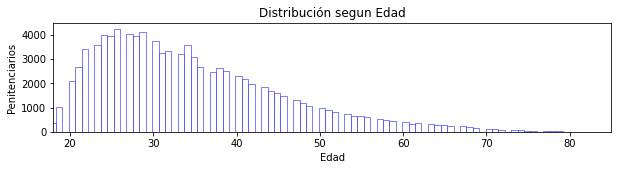

In [ ]:
#Se arma un grafico plt teniendo encuenta la distribución por edad. Como la edad de encarcelamiento es a partir de los 18 años ajustamos las variables.
fig, ax = plt.subplots(figsize=(10,2))

ax.hist(x=df_sneep2020.EdadCenso,  facecolor= "w", bins=100, linewidth=0.5, edgecolor="b")
ax.set(xlim=(18, 85),
       ylim=(0, 4500))

ax.set_title("Distribución segun Edad")
ax.set_ylabel('Penitenciarios')
ax.set_xlabel('Edad')

plt.show()

In [ ]:
df_sex =df_sneep2020.Sexo.value_counts()
df_sex

Varón          91254
Mujer           3568
Trans Mujer      109
Trans Varón       13
Name: Sexo, dtype: int64

In [ ]:
df_nacionalidad =df_sneep2020.Nacionalidad.value_counts()
df_nacionalidad

Argentina      90138
Paraguaya       1827
Peruana          899
Boliviana        799
Chilena          328
Uruguaya         296
Otras            251
Colombiana       215
Brasileña         93
Desconocida       25
China             24
Italiana          18
Española          11
Ecuatoriana       11
Nigeriana          5
Sudafricana        2
Inglesa            2
Name: Nacionalidad, dtype: int64

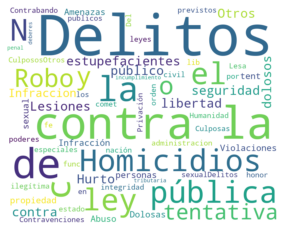

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

texto = "Robo y/o tentativa de robo Violaciones/Abuso sexual Infracción ley n° 23.737 (estupefacientes) Homicidios dolosos Delitos contra las personas Otros delitos contra la propiedad Homicidios dolosos (tent.) Amenazas Hurto y/o tentativa de hurto Lesiones Dolosas Homicidios CulpososOtros delitos contra la integridad sexualDelitos contra la seguridad pública Delitos c/ la administracion pública Privación ilegítima de la libertad Delitos c/el orden público Otros delitos contra la libertad Lesiones Culposas Delitos contra el honor Contrabando de estupefacientes Lesa Humanidad Delitos c/ el estado civil Delitos c/ la fe pública  Delitos previstos en leyes especiales Delitos contra la seguridad de la nación Delitos contra los poderes publicos Del. contra la lib. comet. por func. público Contravenciones  Infraccion ley N° 13.944 incumplimiento de deberes Infraccion ley N° 24.769 penal tributaria"

wc = WordCloud(width = 1000, height = 800,background_color = "white",stopwords = ["Violaciones/Abuso sexual", "Homicidios doloso", "Robo y/o tentativa de robo"])
wc.generate(texto)


plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# plt.show()

#ANALISIS EXPLORATORIO

#Cantidad
¿Cuantas personas de las detenidas son reincidentes y cuantas cometieron un delito primario? 
Evaluamos cual es la cantidad de detenidos por un primer delito y cuantos son reincidente (o reiterante)**

In [ ]:
Reincidencia = df_sneep2020.Es_Reincidente.value_counts()  
Reincidencia

Primario/a    81436
Reiterante    13508
Name: Es_Reincidente, dtype: int64

Text(0.5, 0, 'Cantidad')

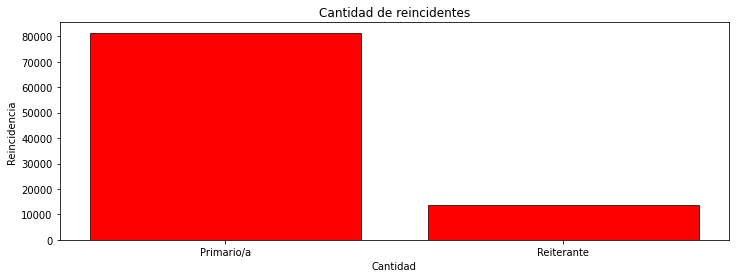

In [ ]:
fig,ax = plt.subplots(figsize =(12, 4))
ax.bar(Reincidencia.index, Reincidencia, color= "red", edgecolor="black", linewidth=0.7)
ax.set_title('Cantidad de reincidentes')
ax.set_ylabel('Reincidencia')
ax.set_xlabel('Cantidad')

Casi un 90% de los detenido durante el censo 2020 realizaron un primer delito,

#Reincidente o no

Para poder trabajar dividimos la informacion por reiterante y primario

In [ ]:
Reincidencia = df_sneep2020.groupby('Es_Reincidente')
Primario = Reincidencia.get_group('Primario/a') 

In [ ]:
Reiterante = Reincidencia.get_group('Reiterante') 
Reiterante

,Provincia,EstablecimientoId,EdadCenso,Sexo,Nacionalidad,Estado_Civil,Nivel_Instrucción,Última_Situación_Laboral,Capacitación_Laboral_Al_Ingresar,Situación_Legal,...,Participación_Programa_Educativo,Calificacion_Conducta,Tentativa_Fugas_Evasiones,Duración_Condena_Años,Duración_Condena_Meses,Es_Reincidente,Tuvo_Salidas_Transitorias,Incorporado_Rég_Semi_Libertad,Participa_Programa_Prisión_Discontinua,Participa_Programa_Semi_Detención
1,Chubut,16,28,Varón,Argentina,Soltero/a,Secundario incompleto,Desocupado/a,Tiene algún oficio,Condenado/a,...,Si - educación formal - SECUNDARIA (Polimodal),Sin calificación,No,4,0,Reiterante,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
2,Chubut,16,33,Varón,Argentina,Conviviente,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,Condenado/a,...,No participa de ningún programa educativo,Buena,No,13,0,Reiterante,Suspendidas durante el Último año,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
3,Chubut,16,35,Varón,Argentina,Conviviente,Primario completo,Desocupado/a,Tiene algún oficio,Condenado/a,...,Si - educación formal - SECUNDARIA (Polimodal),Buena,No,4,6,Reiterante,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
4,Chubut,16,33,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,Condenado/a,...,No participa de ningún programa educativo,Buena,No,5,0,Reiterante,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
5,Chubut,16,23,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,Condenado/a,...,No participa de ningún programa educativo,Buena,No,5,0,Reiterante,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94936,Córdoba,593,27,Varón,Argentina,Soltero/a,Secundario incompleto,Desocupado/a,No tiene ni oficio ni profesión,Condenado/a,...,Si - educación formal - PRIMARIA (EGB),Regular,No,5,5,Reiterante,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
94937,Córdoba,593,35,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,Condenado/a,...,Si - educación formal - SECUNDARIA (Polimodal),Ejemplar,No,10,0,Reiterante,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
94938,Córdoba,593,46,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,Condenado/a,...,Si - educación formal - SECUNDARIA (Polimodal),Ejemplar,No,4,0,Reiterante,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención
94939,Córdoba,593,47,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,Condenado/a,...,Si - educación formal - SECUNDARIA (Polimodal),Ejemplar,No,2,6,Reiterante,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,No está incorporado/a,No tiene semidetención


#Evaluacion segun provincia

In [ ]:
provincias=df_sneep2020.groupby(['Provincia'])['Es_Reincidente'].value_counts().sort_values(ascending= True).reset_index(name='Cantidad')
prov=provincias.head(46)

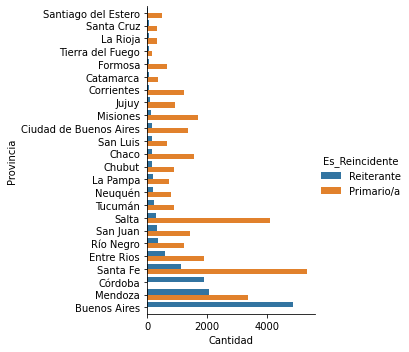

In [ ]:

Reincidencia = sns.catplot(data=prov, kind="bar",x="Cantidad", y="Provincia", hue="Es_Reincidente")

sns.set_style("dark")
sns.set_palette('RdGy')

A excepción de la provincia de Buenos Aires, todas las provincias incluida Ciudad Autónoma de Buenos Aires alojan en sus establecimientos personas que cometieron un único delito.
Buenos Aires es la provincia con mayor detenidos reiterantes.


#Evaluacion segun nacionalidad

In [ ]:
nacionalidad = Reiterante.groupby(['Nacionalidad'])['Es_Reincidente'].value_counts().sort_values(ascending= True).reset_index(name='Cantidad')
nacionalidad1 =Primario.groupby(['Nacionalidad'])['Es_Reincidente'].value_counts().sort_values(ascending= True).reset_index(name='Cantidad')

In [ ]:
Nac = nacionalidad.head(10)
Nac1 =nacionalidad1.head(10)


Text(0.5, 0, 'Cantidad')

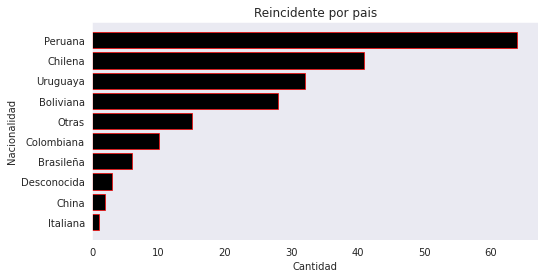

In [ ]:
fig,ax = plt.subplots(figsize =(8, 4))
ax.barh(Nac.Nacionalidad, Nac.Cantidad,color="black", edgecolor="red", linewidth=0.7)
ax.set_title('Reincidente por pais')
ax.set_ylabel('Nacionalidad')
ax.set_xlabel('Cantidad')

Text(0.5, 0, 'Cantidad')

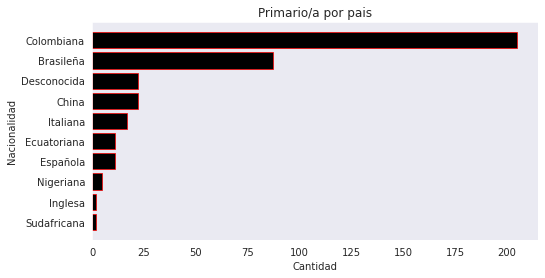

In [ ]:
fig,ax = plt.subplots(figsize =(8, 4))
ax.barh(Nac1.Nacionalidad, Nac1.Cantidad,color="black", edgecolor="red", linewidth=0.7)
ax.set_title('Primario/a por pais')
ax.set_ylabel('Nacionalidad')
ax.set_xlabel('Cantidad')

Como se puede observar en los gráficos la mayoría de los detenidos por delitos reincidentes provienen de países limítrofes o de países que conforman el MERCOSUR.
Es importante aclarar que en este análisis no se tome en cuenta a Argentina, ya que por mayoría los detenidos provienen de dicho país, 


#Evaluacion segun sexo

In [ ]:
df_ReincidenciaSex = Reiterante.groupby('Sexo')['EdadCenso'].mean().reset_index(name='Edad')
df_ReincidenciaSex

,Sexo,Edad
0,Mujer,37.881188
1,Trans Mujer,39.857143
2,Trans Varón,30.500000
3,Varón,35.347075


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



Text(0.5, 0, 'Sexo')

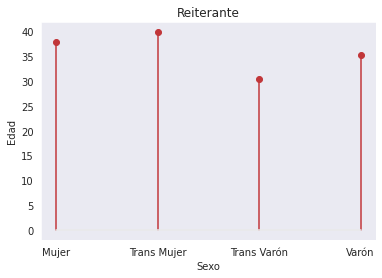

In [ ]:
x = df_ReincidenciaSex.Sexo
y = df_ReincidenciaSex.Edad
fig, ax = plt.subplots()
ax.stem(x, y)
ax.set_title('Reiterante')
ax.set_ylabel('Edad')
ax.set_xlabel('Sexo')

In [ ]:
df_PrimariaSex = Primario.groupby('Sexo')['EdadCenso'].mean().reset_index(name='Edad')
df_PrimariaSex

,Sexo,Edad
0,Mujer,35.860337
1,Trans Mujer,33.343137
2,Trans Varón,33.818182
3,Varón,34.431833


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



Text(0.5, 0, 'Sexo')

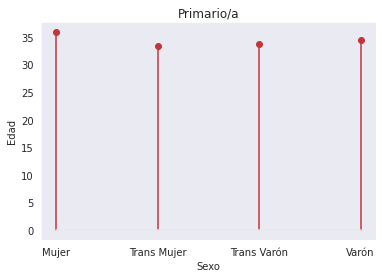

In [ ]:
x = df_PrimariaSex.Sexo
y = df_PrimariaSex.Edad
fig, ax = plt.subplots()
ax.stem(x, y)
ax.set_title('Primario/a')
ax.set_ylabel('Edad')
ax.set_xlabel('Sexo')

Indistintamente del genero de los detenidos, tanto para aquellos que cometen un primer delito o son reincidentes la edad promedio ronda entre los 34-35 años, 

#Evaluacion por estado civil

In [ ]:
df_Est = Reiterante.groupby('Es_Reincidente')['Estado_Civil'].value_counts().reset_index(name='Cantidad')
df_Est

,Es_Reincidente,Estado_Civil,Cantidad
0,Reiterante,Soltero/a,10611
1,Reiterante,Conviviente,1526
2,Reiterante,Casado/a,862
3,Reiterante,Desconocido,247
4,Reiterante,Separado/a o divorciado/a,127
5,Reiterante,Viudo/a,74
6,Reiterante,Separado/a de hecho,61


In [ ]:
df_Est1 = Primario.groupby('Es_Reincidente')['Estado_Civil'].value_counts().reset_index(name='Cantidad')
df_Est1

,Es_Reincidente,Estado_Civil,Cantidad
0,Primario/a,Soltero/a,63810
1,Primario/a,Casado/a,6835
2,Primario/a,Conviviente,6455
3,Primario/a,Desconocido,1925
4,Primario/a,Separado/a o divorciado/a,1436
5,Primario/a,Viudo/a,697
6,Primario/a,Separado/a de hecho,278


In [ ]:
totales_estcivPr = df_Est1["Cantidad"].value_counts().tolist()
totales_vid_Pr = (df_Est1["Cantidad"].value_counts()/df.shape[0]).tolist()

In [ ]:
import plotly.express as px
fig = px.pie(values = [63810, 6835, 6455,1925, 1436, 697, 278],
             names = ['Soltero/a', 'Casado/a', 'Conviviente', 'Desconocido', 'Separado/a o divorciado/a', 'Viudo/a', 'Separado/a de hecho'],
             title = 'Estado Civil')

fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(values = [10611, 862, 1256,247, 127, 74, 61],
             names = ['Soltero/a', 'Casado/a', 'Conviviente', 'Desconocido', 'Separado/a o divorciado/a', 'Viudo/a', 'Separado/a de hecho'],
             title = 'Estado Civil')

fig.show()




In [ ]:
Cond = Reiterante.groupby('Duración_Condena_Años')['Es_Reincidente'].value_counts().sort_values(ascending= False).reset_index(name='Cantidad')
Cond

,Duración_Condena_Años,Es_Reincidente,Cantidad
0,3,Reiterante,2194
1,4,Reiterante,1435
2,5,Reiterante,1321
3,6,Reiterante,991
4,0,Reiterante,847
5,7,Reiterante,817
6,2,Reiterante,747
7,8,Reiterante,671
8,1,Reiterante,615
9,10,Reiterante,515


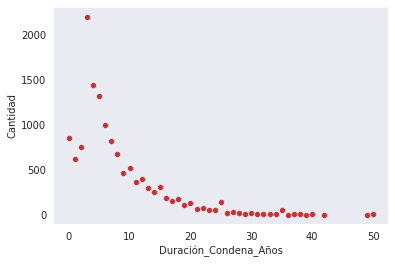

In [ ]:
sns.scatterplot(data=Cond, x="Duración_Condena_Años", y="Cantidad")

In [ ]:
SL = Primario.groupby('Última_Situación_Laboral')['Es_Reincidente'].value_counts().sort_values(ascending= False).reset_index(name='Cantidad')
SL

,Última_Situación_Laboral,Es_Reincidente,Cantidad
0,Desocupado/a,Primario/a,30158
1,Trabajador/ra de tiempo parcial,Primario/a,29427
2,Trabajador/ra de tiempo completo,Primario/a,16496
3,Desconocida,Primario/a,5355


In [ ]:
SL1 =Reiterante.groupby('Última_Situación_Laboral')['Es_Reincidente'].value_counts().sort_values(ascending= False).reset_index(name='Cantidad')
SL1

,Última_Situación_Laboral,Es_Reincidente,Cantidad
0,Desocupado/a,Reiterante,5494
1,Trabajador/ra de tiempo parcial,Reiterante,4502
2,Trabajador/ra de tiempo completo,Reiterante,2124
3,Desconocida,Reiterante,1388


In [ ]:

ST = Primario.groupby('Tuvo_Salidas_Transitorias')['Es_Reincidente'].value_counts().sort_values(ascending= False).reset_index(name='Cantidad')
ST

,Tuvo_Salidas_Transitorias,Es_Reincidente,Cantidad
0,No le fueron otorgadas,Primario/a,79537
1,Si - goza de salidas transitorias,Primario/a,1196
2,Suspendidas durante el Último año,Primario/a,655
3,Revocadas durante el Último año,Primario/a,48


In [ ]:

PP = Primario.groupby('Participa_Programa_Prisión_Discontinua')['Es_Reincidente'].value_counts().sort_values(ascending= False).reset_index(name='Cantidad')
PP

,Participa_Programa_Prisión_Discontinua,Es_Reincidente,Cantidad
0,No está incorporado/a,Primario/a,80869
1,Si está incorporado/a,Primario/a,556
2,Revocada durante el Último año,Primario/a,6
3,Renuncia del interno/a durante el Último año,Primario/a,5


In [ ]:

SD = Primario.groupby('Participa_Programa_Semi_Detención')['Es_Reincidente'].value_counts().sort_values(ascending= False).reset_index(name='Cantidad')
SD

,Participa_Programa_Semi_Detención,Es_Reincidente,Cantidad
0,No tiene semidetención,Primario/a,81385
1,Revocada durante el Último año,Primario/a,30
2,Si. Prisión Nocturna,Primario/a,14
3,Si. Prisión Diurna,Primario/a,6
4,Renuncia del interno/a durante el Último año,Primario/a,1


In [ ]:
DP = Primario.groupby('Delito_1')['Es_Reincidente'].value_counts().sort_values(ascending= False).reset_index(name='Cantidad')
D1 = DP.head(3)


Text(0.5, 0, 'Tipo de Delito')

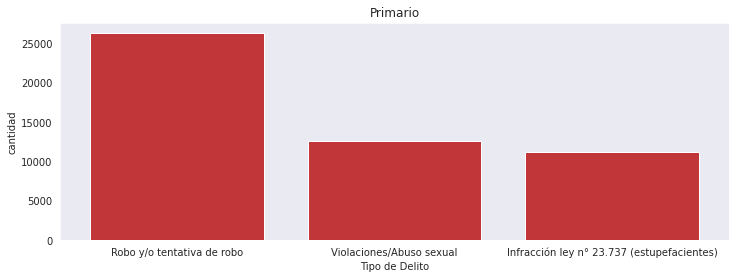

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))  
ax.bar(D1.Delito_1, D1.Cantidad)
ax.set_title('Primario')
ax.set_ylabel('cantidad')
ax.set_xlabel('Tipo de Delito')

In [ ]:
DP2 = Reiterante.groupby('Delito_1')['Es_Reincidente'].value_counts().sort_values(ascending= False).reset_index(name='Cantidad')
D2 = DP2.head(3)


Text(0.5, 0, 'Tipo de Delito')

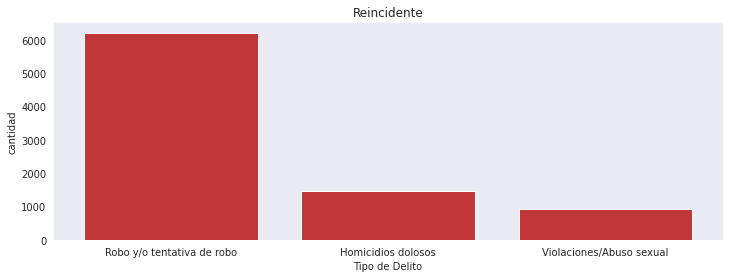

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))  
ax.bar(D2.Delito_1, D2.Cantidad)
ax.set_title('Reincidente')
ax.set_ylabel('cantidad')
ax.set_xlabel('Tipo de Delito')

# Conclusiones

- LA DURACIÓN DE LAS CONDENAS EN PERSONAS REINCIDENTES NO SON MUY ALTAS, POCAS PERSONAS SUPERAN LOS 20 AÑOS; AL SER CONDENAS CORTAS  LA POSIBILIDAD DE UN NUEVO DELITO ES MUY ALTA.
- AQUELLAS PERSONAS QUE COMETEN UN ÚNICO DELITO NO GOZAN DE MAYORES BENEFICIOS,  LA MAYORÍA NO SE ENCUENTRA PARTICIPANDO DE NINGÚN TIPO DE PROGRAMA (SEMIDETENCION, SALIDAS TRANSITORIAS O PRISIÓN SEMIDISCONTINUA)
- LA SITUACIÓN LABORAL NO ES UN PARÁMETRO QUE INFLUYA DEMASIADO EN LA REINCIDENCIA DE LOS DELITOS, YA QUE EN AMBOS CASOS, SI BIEN LA MAYORÍA DE LAS PERSONAS QUE DELINQUEN NO CUENTAN CON UN EMPLEO,  CASI LA MITAD DE LAS PERSONAS DETENIDAS TENÍAN UN TRABAJO PART TIME O FULL TIME
- LOS DELITOS QUE COMETEN POR PRIMERA VEZ LA MAYORÍA DE LOS DETENIDOS ES EL ROBO Y/O TENTATIVA DE ROBO QUE TAMBIÉN ES EL MISMO CON EL CUAL LA MAYORÍA DE LOS REINCIDENTES SE ENCUENTRAN ALOJADOS EN LAS PENITENCIARIAS.
MIENTRAS QUE LOS DEMÁS DELITOS ENTRE UN GRUPO Y EL OTRO VARIA, TENIENDO EN CUENTA CUALES SON LOS TRES DELITOS MAS COMETIDOS POR AMBOS. 
